In [1]:
import pandas as pd
import numpy as np

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [4]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
match[match['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: count, dtype: int64

In [8]:
# Create a dictionary mapping 'venue' to 'city'
venue_to_city = {
    'Dubai International Cricket Stadium': 'Dubai',
    'Sharjah Cricket Stadium': 'Sharjah',
    # Add more mappings as needed
}

# Fill missing values in 'city' based on the 'venue' using the map function
match['city'] = match['city'].fillna(match['venue'].map(venue_to_city))

In [9]:
match['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [10]:
match['city'] = match['city'].replace('Bangalore','Bengaluru')

In [11]:
match['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
delivery['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [13]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bengaluru',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [14]:
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery['batting_team'] = delivery['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')

delivery['batting_team'] = delivery['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

delivery['batting_team'] = delivery['batting_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

In [15]:
print(delivery['batting_team'].unique())
print(delivery['bowling_team'].unique())

['Kolkata Knight Riders' 'Royal Challengers Bengaluru'
 'Chennai Super Kings' 'Punjab Kings' 'Rajasthan Royals' 'Delhi Capitals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Gujarat Titans'
 'Rising Pune Supergiant' 'Lucknow Super Giants']
['Royal Challengers Bengaluru' 'Kolkata Knight Riders' 'Punjab Kings'
 'Chennai Super Kings' 'Delhi Capitals' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Gujarat Titans'
 'Rising Pune Supergiant' 'Lucknow Super Giants']


In [16]:
match['winner'] = match['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
match['winner'] = match['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match['winner'] = match['winner'].str.replace('Gujarat Lions','Gujarat Titans')
match['winner'] = match['winner'].str.replace('Kings XI Punjab','Punjab Kings')
match['winner'] = match['winner'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

In [17]:
match['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Gujarat Titans', 'Rising Pune Supergiant', 'Lucknow Super Giants'],
      dtype=object)

In [18]:
match['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Sunrisers Hyderabad            117
Delhi Capitals                 115
Rajasthan Royals               112
Punjab Kings                   112
Gujarat Titans                  41
Lucknow Super Giants            24
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [19]:
delivery['batting_team'].value_counts()

batting_team
Mumbai Indians                 31437
Sunrisers Hyderabad            30877
Royal Challengers Bengaluru    30023
Delhi Capitals                 29732
Kolkata Knight Riders          29514
Punjab Kings                   29479
Chennai Super Kings            28651
Rajasthan Royals               26242
Gujarat Titans                  9060
Pune Warriors                   5443
Lucknow Super Giants            5400
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

In [20]:
delivery['bowling_team'].value_counts()

bowling_team
Mumbai Indians                 31505
Sunrisers Hyderabad            30756
Royal Challengers Bengaluru    30159
Delhi Capitals                 29941
Kolkata Knight Riders          29663
Punjab Kings                   29202
Chennai Super Kings            28576
Rajasthan Royals               26432
Gujarat Titans                  8846
Pune Warriors                   5457
Lucknow Super Giants            5226
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

In [21]:
delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]

In [22]:
delivery['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [23]:
delivery.shape

(240047, 17)

In [24]:
match['method'].unique()

array([nan, 'D/L'], dtype=object)

In [25]:
match = match[match['method'] != 'D/L']

In [26]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1074 non-null   int64  
 1   season           1074 non-null   object 
 2   city             1074 non-null   object 
 3   date             1074 non-null   object 
 4   match_type       1074 non-null   object 
 5   player_of_match  1069 non-null   object 
 6   venue            1074 non-null   object 
 7   team1            1074 non-null   object 
 8   team2            1074 non-null   object 
 9   toss_winner      1074 non-null   object 
 10  toss_decision    1074 non-null   object 
 11  winner           1069 non-null   object 
 12  result           1074 non-null   object 
 13  result_margin    1055 non-null   float64
 14  target_runs      1071 non-null   float64
 15  target_overs     1071 non-null   float64
 16  super_over       1074 non-null   object 
 17  method           0 

In [27]:
match_df = match[['id','city','winner','target_runs']]

In [28]:
match_df.head(2)

,id,city,winner,target_runs
0,335982,Bengaluru,Kolkata Knight Riders,223.0
1,335983,Chandigarh,Chennai Super Kings,241.0


In [29]:
delivery_df = pd.merge(match_df, delivery, how='inner', left_on='id', right_on='match_id')

In [30]:
delivery_df.sample(5)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
105073,829805,Mumbai,Mumbai Indians,172.0,829805,1,Mumbai Indians,Kolkata Knight Riders,15,8,...,SP Narine,HH Pandya,1,0,1,NaN,0,NaN,NaN,NaN
24432,392232,Johannesburg,Royal Challengers Bengaluru,135.0,392232,1,Delhi Capitals,Royal Challengers Bengaluru,14,3,...,V Kohli,KD Karthik,0,1,1,wides,0,NaN,NaN,NaN
62932,548371,Dharamsala,Punjab Kings,121.0,548371,1,Chennai Super Kings,Punjab Kings,19,5,...,RJ Harris,S Anirudha,0,0,0,NaN,1,DJ Bravo,caught,AC Gilchrist
75857,598056,Chandigarh,Sunrisers Hyderabad,151.0,598056,1,Sunrisers Hyderabad,Punjab Kings,8,6,...,PP Chawla,PA Patel,0,0,0,NaN,0,NaN,NaN,NaN
225160,1422139,Lucknow,Lucknow Super Giants,164.0,1422139,2,Gujarat Titans,Lucknow Super Giants,16,3,...,Yash Thakur,SH Johnson,4,0,4,NaN,0,NaN,NaN,NaN


In [31]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [32]:
delivery_df.describe()

,id,target_runs,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,1.146480e+05,114648.000000,1.146480e+05,114648.0,114648.000000,114648.000000,114648.000000,114648.000000,114648.000000,114648.000000
mean,9.253417e+05,169.748055,9.253417e+05,2.0,8.974191,3.616592,1.258731,0.068322,1.327053,0.049543
std,3.720080e+05,30.636586,3.720080e+05,0.0,5.568314,1.814453,1.640345,0.348171,1.628226,0.217000
min,3.359820e+05,63.000000,3.359820e+05,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483520e+05,150.000000,5.483520e+05,2.0,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.082596e+06,169.000000,1.082596e+06,2.0,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254088e+06,189.000000,1.254088e+06,2.0,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,288.000000,1.426312e+06,2.0,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [33]:
delivery_df.describe(include = 'object')

,city,winner,batting_team,bowling_team,batter,bowler,non_striker,extras_type,player_dismissed,dismissal_kind,fielder
count,114648,114621,114648,114648,114648,114648,114648,6185,5680,5680,4055
unique,34,10,10,10,596,468,581,5,548,10,499
top,Mumbai,Mumbai Indians,Delhi Capitals,Mumbai Indians,V Kohli,R Ashwin,RG Sharma,wides,RG Sharma,caught,KD Karthik
freq,18602,15882,15316,14898,2528,2305,2447,3736,100,3540,99


In [34]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114648 entries, 124 to 237127
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                114648 non-null  int64  
 1   city              114648 non-null  object 
 2   winner            114621 non-null  object 
 3   target_runs       114648 non-null  float64
 4   match_id          114648 non-null  int64  
 5   inning            114648 non-null  int64  
 6   batting_team      114648 non-null  object 
 7   bowling_team      114648 non-null  object 
 8   over              114648 non-null  int64  
 9   ball              114648 non-null  int64  
 10  batter            114648 non-null  object 
 11  bowler            114648 non-null  object 
 12  non_striker       114648 non-null  object 
 13  batsman_runs      114648 non-null  int64  
 14  extra_runs        114648 non-null  int64  
 15  total_runs        114648 non-null  int64  
 16  extras_type       6185 

In [35]:
# Convert 'total_runs_y' to numeric, force non-numeric to NaN
delivery_df['total_runs'] = pd.to_numeric(delivery_df['total_runs'], errors='coerce')

# Drop rows where 'total_runs_y' is still NaN (which means conversion failed for these rows)
delivery_df = delivery_df.dropna(subset=['total_runs'])

# Now perform the groupby and cumulative sum
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs'].cumsum()

In [36]:
delivery_df['runs_left'] = delivery_df['target_runs'] - delivery_df['current_score']
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [37]:
delivery_df.sample(2)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
21125,392218,Port Elizabeth,Mumbai Indians,158.0,392218,2,Royal Challengers Bengaluru,Mumbai Indians,14,6,...,0,2,NaN,0,NaN,NaN,NaN,100,58.0,30
111520,980951,Delhi,Delhi Capitals,187.0,980951,2,Kolkata Knight Riders,Delhi Capitals,18,1,...,1,1,wides,0,NaN,NaN,NaN,157,30.0,11


In [38]:
delivery_df['balls_left'].unique()

array([119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107,
       106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,
        93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,
        80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,
        67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,
        54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,
        41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,  29,
        28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,
        15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
         2,   1,   0,  -1,  -2,  -3], dtype=int64)

In [39]:
print((delivery_df['balls_left'] < 0).sum())
print((delivery_df['balls_left'] == -1).sum())
print((delivery_df['balls_left'] == -2).sum())
print((delivery_df['balls_left'] == -3).sum())

125
103
20
2


In [40]:
delivery_df.loc[delivery_df['balls_left'] < 0, 'balls_left'] = 0
print((delivery_df['balls_left'] < 0).sum())

0


In [41]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [42]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114648 entries, 124 to 237127
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                114648 non-null  int64  
 1   city              114648 non-null  object 
 2   winner            114621 non-null  object 
 3   target_runs       114648 non-null  float64
 4   match_id          114648 non-null  int64  
 5   inning            114648 non-null  int64  
 6   batting_team      114648 non-null  object 
 7   bowling_team      114648 non-null  object 
 8   over              114648 non-null  int64  
 9   ball              114648 non-null  int64  
 10  batter            114648 non-null  object 
 11  bowler            114648 non-null  object 
 12  non_striker       114648 non-null  object 
 13  batsman_runs      114648 non-null  int64  
 14  extra_runs        114648 non-null  int64  
 15  total_runs        114648 non-null  int64  
 16  extras_type       6185 

In [43]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,...,1,NaN,0,0,NaN,NaN,1,222.0,119,10
125,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,...,1,wides,0,0,NaN,NaN,2,221.0,118,10
126,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,...,0,NaN,0,0,NaN,NaN,2,221.0,117,10
127,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,...,1,NaN,0,0,NaN,NaN,3,220.0,116,10
128,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,...,1,NaN,0,0,NaN,NaN,4,219.0,115,10


In [44]:
# Finding current runrate
# Runrate = run/over
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [45]:
# Required runrate
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [46]:
delivery_df[delivery_df['winner'].isnull()]

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
105839,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,1,...,0,0,NaN,NaN,0,188.0,119,10,0.000000,9.478992
105840,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,2,...,0,0,NaN,NaN,1,187.0,118,10,3.000000,9.508475
105841,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,3,...,0,0,NaN,NaN,1,187.0,117,10,2.000000,9.589744
105842,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,4,...,0,0,NaN,NaN,1,187.0,116,10,1.500000,9.672414
105843,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,5,...,0,0,NaN,NaN,1,187.0,115,10,1.200000,9.756522
105844,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,6,...,0,0,NaN,NaN,2,186.0,114,10,2.000000,9.789474
105845,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,1,1,...,0,0,NaN,NaN,2,186.0,113,10,1.714286,9.876106
153069,1178424,Bengaluru,NaN,63.0,1178424,2,Rajasthan Royals,Royal Challengers Bengaluru,0,1,...,0,0,NaN,NaN,0,63.0,119,10,0.000000,3.176471
153070,1178424,Bengaluru,NaN,63.0,1178424,2,Rajasthan Royals,Royal Challengers Bengaluru,0,2,...,0,0,NaN,NaN,6,57.0,118,10,18.000000,2.898305
153071,1178424,Bengaluru,NaN,63.0,1178424,2,Rajasthan Royals,Royal Challengers Bengaluru,0,3,...,0,0,NaN,NaN,10,53.0,117,10,20.000000,2.717949


In [47]:
match_df[match_df['id']==829813]

,id,city,winner,target_runs
511,829813,Bengaluru,NaN,188.0


In [48]:
match_df[match_df['id']==1178424]

,id,city,winner,target_runs
744,1178424,Bengaluru,NaN,63.0


In [49]:
delivery_df.dropna(subset=['winner'], inplace=True)

In [50]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114621 entries, 124 to 237127
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                114621 non-null  int64  
 1   city              114621 non-null  object 
 2   winner            114621 non-null  object 
 3   target_runs       114621 non-null  float64
 4   match_id          114621 non-null  int64  
 5   inning            114621 non-null  int64  
 6   batting_team      114621 non-null  object 
 7   bowling_team      114621 non-null  object 
 8   over              114621 non-null  int64  
 9   ball              114621 non-null  int64  
 10  batter            114621 non-null  object 
 11  bowler            114621 non-null  object 
 12  non_striker       114621 non-null  object 
 13  batsman_runs      114621 non-null  int64  
 14  extra_runs        114621 non-null  int64  
 15  total_runs        114621 non-null  int64  
 16  extras_type       6183 

### If batting team of second inning won then result is 1 else it is 0

In [52]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [53]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [54]:
delivery_df.sample(5)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
216512,1359533,Delhi,Punjab Kings,168.0,1359533,2,Delhi Capitals,Punjab Kings,2,4,...,0,NaN,NaN,29,139.0,104,10,10.875000,8.019231,0
138831,1136610,Mumbai,Mumbai Indians,187.0,1136610,2,Punjab Kings,Mumbai Indians,3,2,...,0,NaN,NaN,33,154.0,100,10,9.900000,9.240000,0
65148,548381,Chennai,Kolkata Knight Riders,191.0,548381,2,Kolkata Knight Riders,Chennai Super Kings,6,3,...,0,NaN,NaN,58,133.0,81,9,8.923077,9.851852,1
17748,392203,East London,Mumbai Indians,149.0,392203,2,Kolkata Knight Riders,Mumbai Indians,15,5,...,0,NaN,NaN,108,41.0,25,7,6.821053,9.840000,0
154209,1178429,Bengaluru,Royal Challengers Bengaluru,176.0,1178429,2,Royal Challengers Bengaluru,Sunrisers Hyderabad,10,2,...,0,NaN,NaN,84,92.0,58,7,8.129032,9.517241,1


In [55]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','target_runs','crr','rrr','result']]

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114621 entries, 124 to 237127
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  114621 non-null  object 
 1   bowling_team  114621 non-null  object 
 2   city          114621 non-null  object 
 3   runs_left     114621 non-null  float64
 4   balls_left    114621 non-null  int64  
 5   wickets       114621 non-null  int32  
 6   target_runs   114621 non-null  float64
 7   crr           114621 non-null  float64
 8   rrr           114600 non-null  float64
 9   result        114621 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 9.2+ MB


In [57]:
final_df[final_df['rrr'].isnull()]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
6618,Chennai Super Kings,Delhi Capitals,Delhi,0.0,0,4,188.0,9.40,NaN,1
11790,Rajasthan Royals,Mumbai Indians,Jaipur,0.0,0,5,146.0,7.30,NaN,1
13190,Rajasthan Royals,Chennai Super Kings,Mumbai,0.0,0,3,164.0,8.20,NaN,1
18763,Punjab Kings,Kolkata Knight Riders,Port Elizabeth,0.0,0,6,154.0,7.70,NaN,1
24345,Kolkata Knight Riders,Chennai Super Kings,Centurion,0.0,0,7,189.0,9.45,NaN,1
56033,Chennai Super Kings,Rajasthan Royals,Chennai,0.0,0,7,147.0,7.35,NaN,1
59696,Mumbai Indians,Chennai Super Kings,Mumbai,0.0,0,2,174.0,8.70,NaN,1
68162,Chennai Super Kings,Royal Challengers Bengaluru,Chennai,0.0,0,4,166.0,8.30,NaN,1
129559,Delhi Capitals,Mumbai Indians,Mumbai,0.0,0,7,195.0,9.75,NaN,1
147217,Mumbai Indians,Punjab Kings,Mumbai,0.0,0,3,198.0,9.90,NaN,1


In [58]:
final_df = final_df.fillna(0)

In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114621 entries, 124 to 237127
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  114621 non-null  object 
 1   bowling_team  114621 non-null  object 
 2   city          114621 non-null  object 
 3   runs_left     114621 non-null  float64
 4   balls_left    114621 non-null  int64  
 5   wickets       114621 non-null  int32  
 6   target_runs   114621 non-null  float64
 7   crr           114621 non-null  float64
 8   rrr           114621 non-null  float64
 9   result        114621 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 9.2+ MB


In [60]:
final_df.shape[0]

114621

In [61]:
final_df = final_df.sample(final_df.shape[0])

In [62]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
153243,Delhi Capitals,Chennai Super Kings,Chennai,131.0,90,9,180.0,9.8,8.733333,0


In [63]:
final_df[final_df['balls_left'] == 0]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
121359,Gujarat Titans,Royal Challengers Bengaluru,Rajkot,22.0,0,3,214.0,9.60,inf,0
46787,Sunrisers Hyderabad,Kolkata Knight Riders,Hyderabad,22.0,0,4,170.0,7.40,inf,0
230027,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,37.0,0,2,207.0,8.50,inf,0
39603,Delhi Capitals,Sunrisers Hyderabad,Delhi,12.0,0,3,146.0,6.70,inf,0
82183,Royal Challengers Bengaluru,Kolkata Knight Riders,Sharjah,3.0,0,5,151.0,7.40,inf,0
...,...,...,...,...,...,...,...,...,...,...
79540,Chennai Super Kings,Mumbai Indians,Kolkata,28.0,0,1,149.0,6.05,inf,0
61370,Kolkata Knight Riders,Mumbai Indians,Kolkata,28.0,0,6,183.0,7.75,inf,0
221267,Mumbai Indians,Gujarat Titans,Ahmedabad,7.0,0,1,169.0,8.10,inf,0
59446,Punjab Kings,Rajasthan Royals,Chandigarh,45.0,0,2,178.0,6.65,inf,0


In [64]:
final_df = final_df[final_df['balls_left'] != 0]

In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114101 entries, 148669 to 189665
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  114101 non-null  object 
 1   bowling_team  114101 non-null  object 
 2   city          114101 non-null  object 
 3   runs_left     114101 non-null  float64
 4   balls_left    114101 non-null  int64  
 5   wickets       114101 non-null  int32  
 6   target_runs   114101 non-null  float64
 7   crr           114101 non-null  float64
 8   rrr           114101 non-null  float64
 9   result        114101 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 9.1+ MB


In [66]:
# Check if there are any positive or negative infinity values in the DataFrame
infinity_check = final_df.isin([np.inf, -np.inf])

# Summarize the number of infinity values in each column
print("Number of infinity values in each column:\n", infinity_check.sum())

Number of infinity values in each column:
 batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
target_runs     0
crr             0
rrr             0
result          0
dtype: int64


In [67]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [68]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr
30070,Chennai Super Kings,Punjab Kings,Chennai,72.0,69,10,137.0,7.647059,6.260870
91499,Delhi Capitals,Mumbai Indians,Mumbai,141.0,96,10,174.0,8.250000,8.812500
120349,Punjab Kings,Delhi Capitals,Delhi,64.0,16,4,189.0,7.211538,24.000000
30131,Chennai Super Kings,Punjab Kings,Chennai,12.0,11,5,137.0,6.880734,6.545455
73647,Punjab Kings,Chennai Super Kings,Chennai,88.0,46,7,187.0,8.027027,11.478261


In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [70]:
trf1 = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)

## Using XGBClassifier 

In [72]:
# Assuming trf1 and trf3 are already defined transformation steps

pipe_xg = Pipeline(steps=[
    ('step1', trf1),  # Your first transformation step
    ('step2', StandardScaler()),  # Standard Scaler for feature scaling
    ('step3', XGBClassifier(n_estimators=1000, learning_rate=0.25, max_depth=12, random_state=1))  # XGBoost Classifier
])

In [73]:
pipe_xg.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.25,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [74]:
y_pred = pipe_xg.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.9992112527934797

In [76]:
pipe_xg.predict_proba(X_test)[7]

array([2.2417307e-04, 9.9977583e-01], dtype=float32)

## Using RandomForest Classifier

In [78]:
# Assuming trf1 and trf3 are already defined transformation steps

pipe_rf = Pipeline(steps=[
    ('step1', trf1),  # Your first transformation step
    ('step2', StandardScaler()),  # Standard Scaler for feature scaling
    ('step3', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=1))  # RandomForest Classifier
])

In [79]:
pipe_rf.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 RandomForestClassifier(max_depth=12, random_state=1))])

In [80]:
y_pred = pipe_rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8805486175014241

In [81]:
pipe_rf.predict_proba(X_test)[10]

array([0.44079246, 0.55920754])

## Using Logistic Regression

In [83]:
pipe_lr = Pipeline(steps=[
    ('step1', trf1),  # Your first transformation step
    ('step2', StandardScaler()),  # Standard Scaler for feature scaling
    ('step3', LogisticRegression(max_iter=1000, random_state=1))  # Logistic Regression
])

In [84]:
pipe_lr.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3', LogisticRegression(max_iter=1000, random_state=1))])

In [85]:
y_pred = pipe_lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.8036457648656938

## Using Gridsearch Cv in RandomForest Classifier

In [87]:
pipe_rf = Pipeline(steps=[
    ('step1', trf1),  # Your first transformation step
    ('step2', StandardScaler()),  # Standard Scaler for feature scaling
    ('step3', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=1))  # RandomForest Classifier
])

In [88]:
param_grid = {
    'step3__n_estimators': [200, 500,1000],  # Number of trees in the forest
    'step3__max_depth': [10, 12, 15],        # Maximum depth of the tree
    'step3__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

In [89]:
grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [90]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


D:\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('trf',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['batting_team',
                                                                          'bowling_team',
                                                                          'city'])])),
                                       ('step2', StandardScaler()),
                                       ('step3',
                                        RandomForestClassifier(max_depth=12,
                                                               random_state=1))]),
             n_jobs=-1,
             param_grid={'step3__max_depth': [10, 12, 15],
                         'step3__min_samples_split': [2, 5, 10],
                         'step3__n_estimators': [200, 500, 1000]},
             scoring='accuracy', verbose=2)

In [91]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'step3__max_depth': 15, 'step3__min_samples_split': 2, 'step3__n_estimators': 500}
Best Cross-Validation Score: 0.9359005258545136


In [92]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test,y_pred)

0.9374698742386398

In [93]:
# Access the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Display the best model
print(best_model)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 RandomForestClassifier(max_depth=15, n_estimators=500,
                                        random_state=1))])


In [183]:
import pickle

# Save the best model to a file
with open('winner_predictor.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [185]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [187]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','target_runs','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose_prob'] = np.round(result.T[0]*100,1)
    temp_df['win_prob'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['target_runs'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','runs_left','wickets_in_over','lose_prob','win_prob']]
    return temp_df,target

In [189]:
temp_df,target = match_progression(delivery_df, 335985 ,grid_search)
temp_df

Target- 166.0


,end_of_over,runs_after_over,runs_left,wickets_in_over,lose_prob,win_prob
820,1,10.0,156.0,0,29.7,70.3
826,2,1.0,155.0,0,32.6,67.4
832,3,11.0,144.0,0,25.5,74.5
838,4,5.0,139.0,0,27.8,72.2
844,5,10.0,129.0,0,25.2,74.8
851,6,3.0,126.0,1,28.9,71.1
857,7,6.0,120.0,0,36.7,63.3
863,8,8.0,112.0,0,34.5,65.5
869,9,14.0,98.0,1,27.9,72.1
876,10,8.0,90.0,1,28.6,71.4


Text(0.5, 1.0, 'Target-166.0')

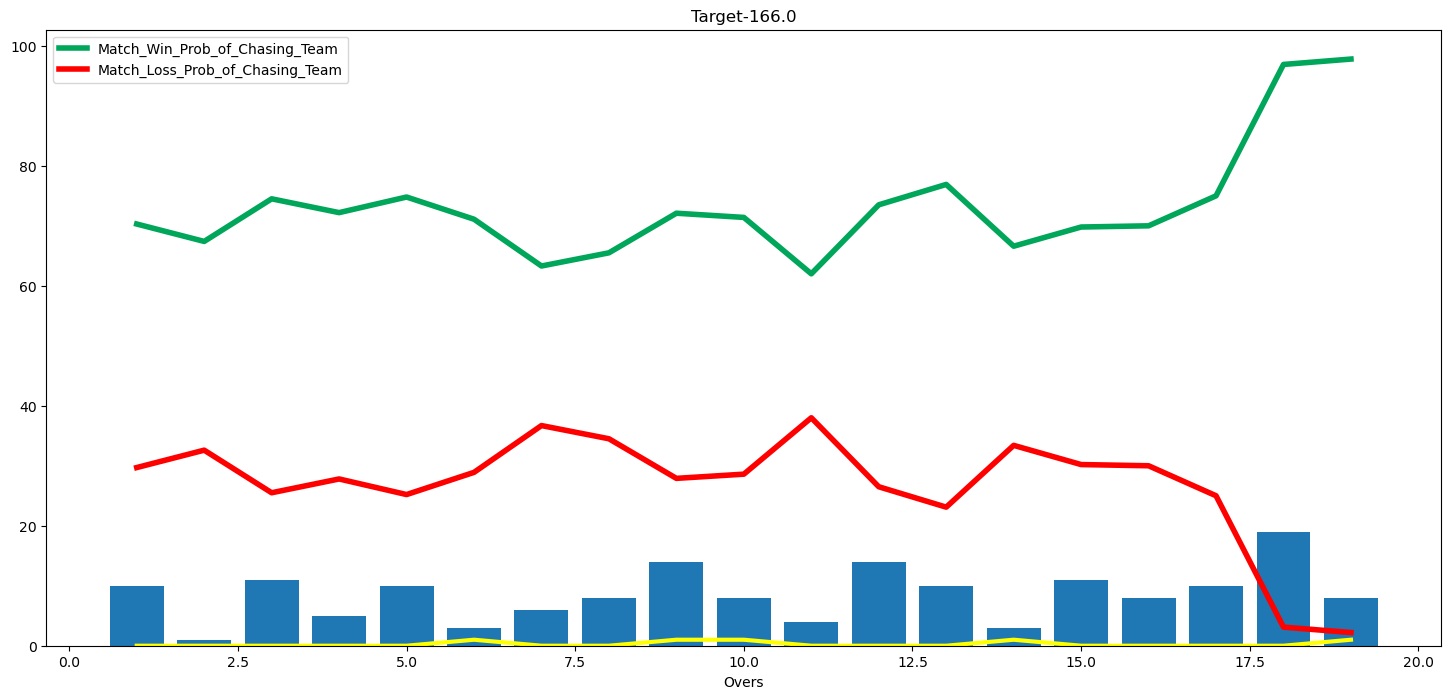

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win_prob'],color='#00a65a',label = 'Match_Win_Prob_of_Chasing_Team',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose_prob'],color='red',label = 'Match_Loss_Prob_of_Chasing_Team',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.xlabel('Overs')
plt.legend()
plt.title('Target-' + str(target))

In [195]:
final_df['city'].unique()

array(['Hyderabad', 'Mumbai', 'Bengaluru', 'Delhi', 'Durban', 'Kolkata',
       'Jaipur', 'Chandigarh', 'Chennai', 'Abu Dhabi', 'Navi Mumbai',
       'Sharjah', 'Nagpur', 'Dharamsala', 'Mohali', 'Dubai', 'Pune',
       'Ahmedabad', 'Visakhapatnam', 'Rajkot', 'Lucknow', 'Ranchi',
       'Cuttack', 'Guwahati', 'Raipur', 'Johannesburg', 'Kanpur',
       'Centurion', 'Kimberley', 'Cape Town', 'Indore', 'Port Elizabeth',
       'East London', 'Bloemfontein'], dtype=object)